    ## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [167]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [168]:
# your code here
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
# print(data.head(5), data.tail(5), data.shape)
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


 ### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [169]:
# your code here
data.isnull().values.any()
#Количественные: duration, amount, age, number_credits,
#Бинарные: telephone, foreign_worker, people_liable
#Порядковые: installment_rate, status, savings, employment_duration, present_residence, housing
#Категориальные: purpose, personal_status_sex, other_debtors, property, job, other_installment_plans

False

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [170]:
# your code here
data.groupby(['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [171]:
# your code here
print((data.loc[(data['age'] < 30) & (data['housing'] == 'rent')]['housing'].count() / data.loc[data['age'] < 30]['housing'].count())*100)
print((data.loc[(data['age'] > 40) & (data['housing'] == 'rent')]['housing'].count() / data.loc[data['age'] > 40]['housing'].count())*100)

66.66666666666666
68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [172]:
# your code here
data.loc[(data['foreign_worker'] == 'yes') & (data['number_credits'] != '1') & (data['number_credits'] != '2-3')]['status'].count()

1

### Задание 6 (1 балл)

In [173]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

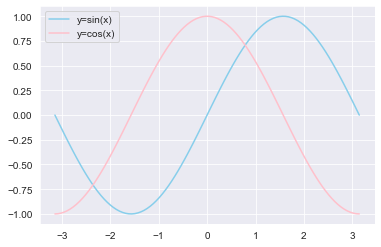

In [174]:
# your code here
x = np.linspace(-np.pi, np.pi, 100)
y_1 = np.sin(x)
y_2 = np.cos(x)

plt.plot(x, y_1, label = 'y=sin(x)', color = 'skyblue')
plt.plot(x, y_2, label = 'y=cos(x)', color = 'pink')

plt.legend()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

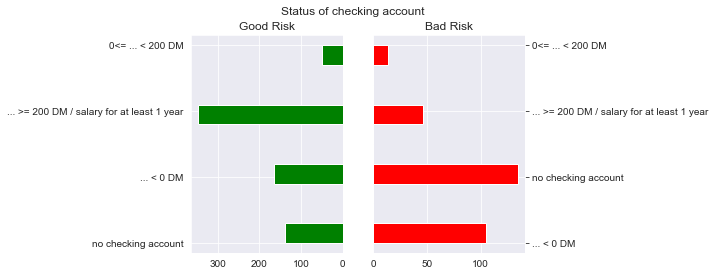

In [175]:
# your code here
y = data['status'].unique()

plot, (subplot1, subplot2) = plt.subplots(nrows=1, ncols=2)
x1 = data[data['credit_risk'] == 'good']['status']
x2 = data[data['credit_risk'] == 'bad']['status']

subplot1.hist(x1, histtype='bar', orientation='horizontal', label=y, color= 'green')
subplot1.set_title('Good Risk')
subplot1.invert_xaxis()

subplot2.hist(x2, histtype = 'bar', orientation='horizontal', label= y, color= 'red')
subplot2.set_title('Bad Risk')
subplot2.axes.yaxis.tick_right()

plot.suptitle('Status of checking account')
plt.show()

### Задание 8  (0.5 балла)

In [176]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

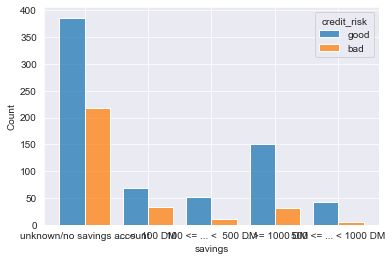

In [177]:
# your code here
sns.histplot(data=data, x='savings', hue='credit_risk', multiple="dodge", shrink=.8)
plt.show()

# объективно, seaborn дает сделать все более емко и возможно читаемо. но разнообразие различных функций и параметров, которые на первый взгляд кажутся одинаковыми сбивает с току, пока с головой не окунешься в соответствующее направления. а оно того не стоит.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

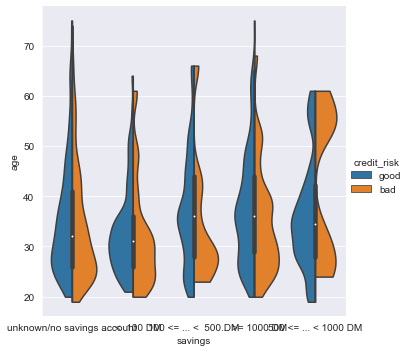

In [178]:
# your code here
sns.catplot(data=data, x='savings', y='age', hue='credit_risk', kind='violin', bw=.25, cut=0, split=True)

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

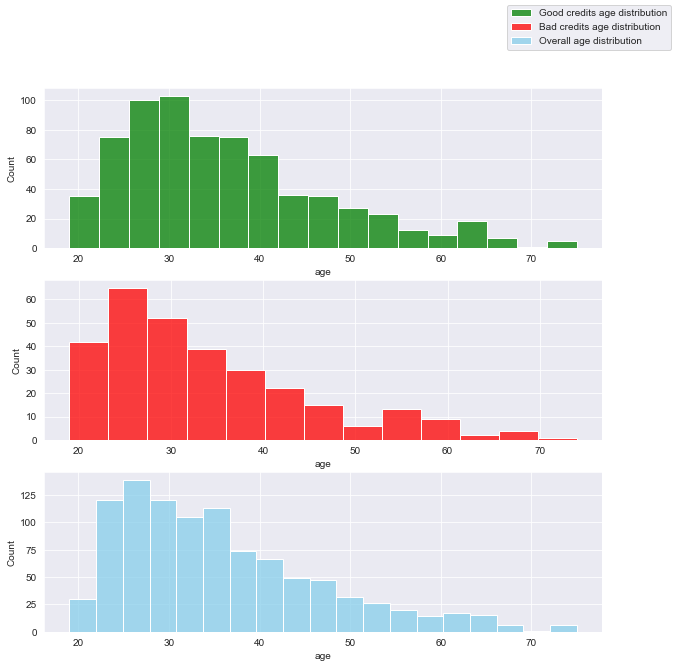

In [179]:
# your code here
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

sns.histplot(data=data[data['credit_risk'] == 'good'], ax=axes[0], x='age', label='Good credits age distribution', color='Green')
sns.histplot(data=data[data['credit_risk'] == 'bad'], ax=axes[1], x='age', label='Bad credits age distribution', color='Red')
sns.histplot(data=data, ax=axes[2], x='age', label='Overall age distribution', color='skyblue')

plt.figlegend()
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

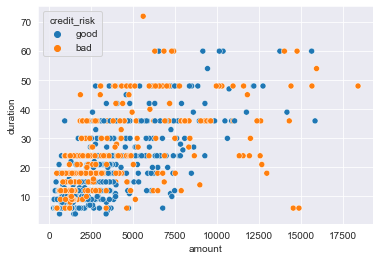

In [180]:
# your code here
sns.scatterplot(data=data, x='amount', y='duration', hue='credit_risk')
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

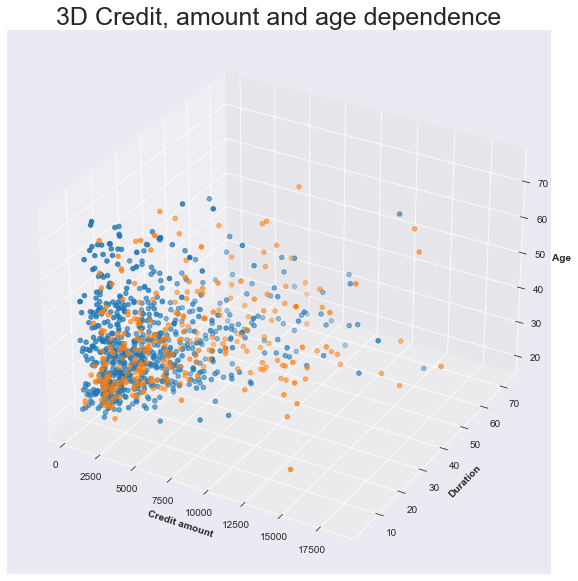

In [181]:
# your code here
figure = plt.figure(figsize=(10,10))
axis = figure.add_subplot(projection = '3d')
x_good = data.query('`credit_risk` == "good"')['amount']
y_good = data.query('`credit_risk` == "good"')['duration']
z_good = data.query('`credit_risk` == "good"')['age']


x_bad = data.query('`credit_risk` == "bad"')['amount']
y_bad = data.query('`credit_risk` == "bad"')['duration']
z_bad = data.query('`credit_risk` == "bad"')['age']

axis.set_xlabel('Credit amount', fontweight='bold')
axis.set_ylabel('Duration', fontweight='bold')
axis.set_zlabel('Age', fontweight='bold')
axis.set_title('3D Credit, amount and age dependence', fontsize = 25)

axis.scatter(x_good, y_good, z_good)
axis.scatter(x_bad, y_bad, z_bad)

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [182]:
# your code here
#Бинарные: telephone, foreign_worker, people_liable
#Порядковые: installment_rate, status, savings, employment_duration, present_residence, housing
#применим разные способы решения задачи)

def check_status(status_i):
    if status_i == 'no checking account':
        return 0
    if status_i == '... < 0 DM':
        return 0
    if status_i == '0<= ... < 200 DM':
        return 100
    if status_i == '... >= 200 DM / salary for at least 1 year':
        return 300

def check_number_credits(credit_i):
    if credit_i == '1':
        return 0
    if credit_i == '2-3':
        return 1
    if credit_i == '4-5':
        return 2
    if credit_i == '>= 6':
        return 3
data['status'] = list(map(check_status, data['status']))
data['number_credits'] = list(map(check_number_credits, data['number_credits']))
data['employment_duration'] = data['employment_duration'].map({'unemployed' : 0, '< 1 yr' : 1, '1 <= ... < 4 yrs' : 2, '4 <= ... < 7 yrs' : 3, '>= 7 yrs' : 4})
data['savings'] = data['savings'].map({'unknown/no savings account' : 0, '... <  100 DM' : 50, '100 <= ... <  500 DM' : 350, '500 <= ... < 1000 DM' : 750, '... >= 1000 DM' : 1500})
data['installment_rate'] = data['installment_rate'].map({'< 20' : 10, '20 <= ... < 25' : 22, '25 <= ... < 35' : 30, '>= 35' : 40})
data['present_residence'] = data['present_residence'].map({'< 1 yr' : 0, '1 <= ... < 4 yrs' : 1, '4 <= ... < 7 yrs' : 2, '>= 7 yrs' : 3})

data.telephone = data.telephone.apply(lambda x : 0 if x == 'no' else 1)
data.credit_risk = data.credit_risk.apply(lambda x : 1 if x == 'good' else 0)
data.foreign_worker = data.foreign_worker.apply(lambda x : 1 if x == 'yes' else 0)
data.people_liable = data.people_liable.apply(lambda x : 0 if x == '0 to 2' else 1)

data = data.drop(columns=['credit_history', 'housing', 'job', 'purpose', 'property', 'personal_status_sex', 'other_debtors', 'other_installment_plans'])
data

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,10,3,21,0,0,0,0,1
1,0,9,2799,0,2,30,1,36,1,1,0,0,1
2,0,12,841,50,3,30,3,23,0,0,0,0,1
3,0,12,2122,0,2,22,1,39,1,1,0,1,1
4,0,12,2171,0,2,10,3,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,2,30,3,21,0,1,0,0,0
996,0,24,2303,0,4,10,0,45,0,0,0,0,0
997,300,21,12680,1500,4,10,3,30,0,0,1,0,0
998,0,12,6468,1500,0,30,0,52,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [183]:
def predict(Xtest: np.array) -> np.array:
    # your code here
    result = []
    for line in Xtest:
        result.append(line[0]*(line[1]* (1-line[5]/100)) - line[2]  + line[3] + line[9] * 500)
    m = np.mean(result)
    for i in range(len(result)):
        if result[i] >= m:
            result[i] = 1
        else:
            result[i] = 0
    return np.array(result)


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

/var/folders/pv/nhf7l8nx53j99_p19cwjtqqm0000gn/T/ipykernel_11163/1675077447.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.64